In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [48]:
org_and_train_preprocessed = np.load('./data/transformed/org_and_train_preprocessed.npz')
test_unseen_preprocessed = np.load('./data/transformed/test_unseen_preprocessed.npz')

X, y = org_and_train_preprocessed['X'], org_and_train_preprocessed['y']
test_unseen_X = test_unseen_preprocessed['X']

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
def evaluvate(model, train, test):
    X_train, y_train = train
    X_test, y_test = test

    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)

    fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)
    train_axs, test_axs = axs

    ConfusionMatrixDisplay(confusion_matrix(y_true=y_train, y_pred=y_train_predicted)).plot(ax=train_axs)
    train_axs.set(title = 'Train Confusion Matrix')

    ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_test_predicted)).plot(ax=test_axs)
    test_axs.set(title = 'Test Confusion Matrix')

    train_auc = roc_auc_score(y_train, y_train_predicted)
    test_auc = roc_auc_score(y_test, y_test_predicted)

    print('---------- Train - Classification Report ----------')
    print(classification_report(y_true=y_train, y_pred=y_train_predicted))
    print(f"AUC - {train_auc}\n")
    
    print('---------- Test - Classification Report ----------')
    print(classification_report(y_true=y_test, y_pred=y_test_predicted))
    print(f"AUC - {test_auc}")


# Modelling

## Logistic Regression

---------- Train - Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114248
           1       0.99      0.79      0.88      1968

    accuracy                           1.00    116216
   macro avg       1.00      0.90      0.94    116216
weighted avg       1.00      1.00      1.00    116216

AUC - 0.8963064518608215

---------- Test - Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28554
           1       0.99      0.78      0.87       500

    accuracy                           1.00     29054
   macro avg       0.99      0.89      0.94     29054
weighted avg       1.00      1.00      1.00     29054

AUC - 0.8899474679554528


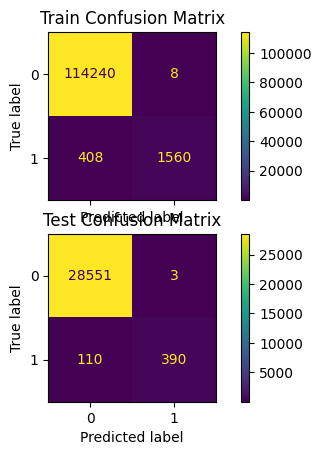

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

evaluvate(lr, (X_train, y_train), (X_test, y_test))

## Hist Gradient Boosting Classifier

---------- Train - Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114248
           1       0.99      0.80      0.89      1968

    accuracy                           1.00    116216
   macro avg       1.00      0.90      0.94    116216
weighted avg       1.00      1.00      1.00    116216

AUC - 0.9011293111889523

---------- Test - Classification Report ----------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28554
           1       0.98      0.78      0.87       500

    accuracy                           1.00     29054
   macro avg       0.99      0.89      0.94     29054
weighted avg       1.00      1.00      1.00     29054

AUC - 0.89187742522939


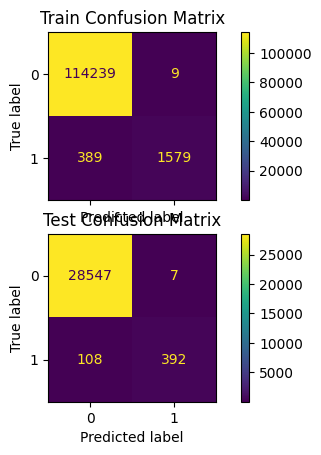

In [52]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc = HistGradientBoostingClassifier()

hgbc.fit(X_train, y_train)

evaluvate(hgbc, (X_train, y_train), (X_test, y_test))

In [60]:
from datetime import datetime

model = lr
model_name = "lr"

now = datetime.now().strftime("%Y%m%d_%H%M%S")

output = pd.read_csv("./data/input/sample_submission.csv", index_col=0)
output['Machine failure'] = model.predict(test_unseen_X)

# output.to_csv(f"./data/output/machine_failure_{model_name}_{now}.csv", index=True)